In [1]:
import torch
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torchvision.models import ResNet34_Weights
import numpy as np
import torchvision.transforms as transforms        
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from src.temperature_scaling import ModelWithTemperature
from src.imagenet_real import aps_imagenet_real_hist, raps_imagenet_real_hist, saps_imagenet_real_hist, aps_imagenet_real_scatter, raps_imagenet_real_scatter, saps_imagenet_real_scatter

#  Preprocess
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

sorted_val_path = "D:\\Download\\ImageNet-1K\\Validation_Set\\sorted_ImageNet_val"
dataset = ImageFolder(root=sorted_val_path, transform=data_transform)

# load pre-trained model 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet34(weights=ResNet34_Weights.IMAGENET1K_V1).to(device)


# Temperature Scaling
subset_size = len(dataset) // 10
indices = np.random.choice(len(dataset), subset_size, replace=False)
subset_dataset = Subset(dataset, indices)
train_loader = DataLoader(subset_dataset, batch_size=32, shuffle=False, num_workers=2)
model = ModelWithTemperature(model, temperature = 1.2).to(device)
model.set_temperature(train_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.1

Before temperature - NLL: 1.142, ECE: 0.024
Optimal temperature: 1.122
After temperature - NLL: 1.152, ECE: 0.039


APS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9016 ± 0.0019
Final Average Prediction Set Size: 14.16 ± 0.35
Final Average Coverage: 0.8992 ± 0.0026
Final Average Real Probability: 0.8182 ± 0.0036


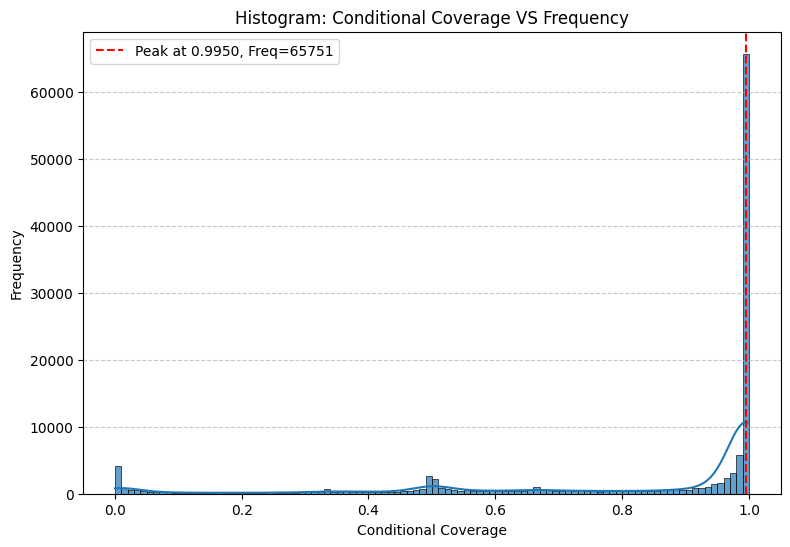

65751 (52.87%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_imagenet_real_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

RAPS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9348 ± 0.0025
Final Average Prediction Set Size: 4.34 ± 0.04
Final Average Coverage: 0.8987 ± 0.0029
Final Average Real Probability: 0.7872 ± 0.0035


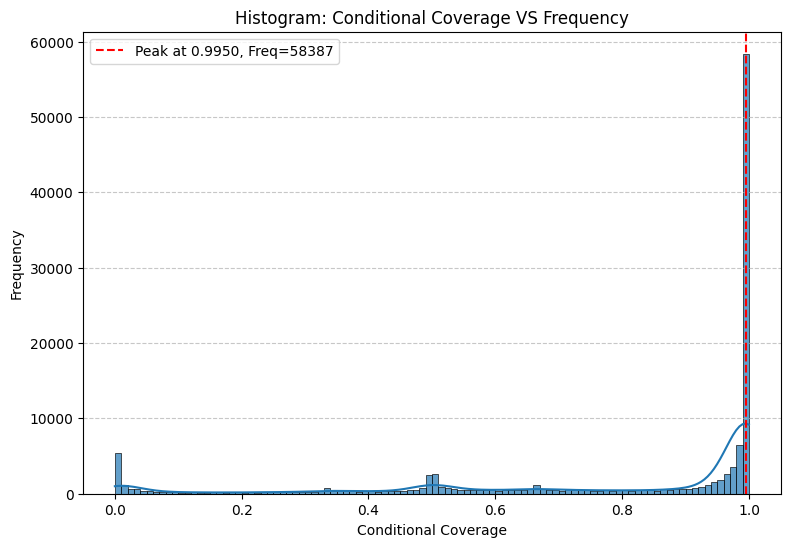

58387 (46.95%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_imagenet_real_hist(model, dataset, device, lambda_=0.07, k_reg=9, num_runs=10, alpha=0.1, is_ground_truth=False)

SAPS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0193 ± 0.0113
Final Average Prediction Set Size: 2.96 ± 0.07
Final Average Coverage: 0.8990 ± 0.0037
Final Average Real Probability: 0.7427 ± 0.0055


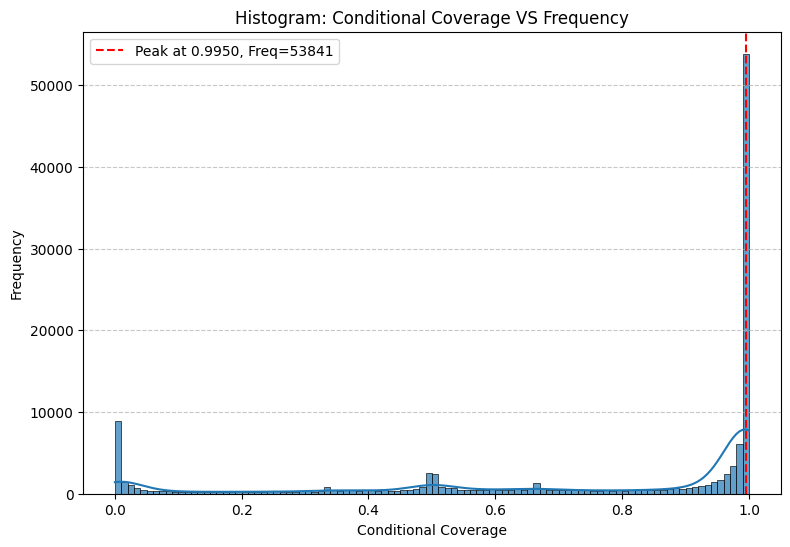

53841 (43.29%) samples reached the peak conditional coverage at 0.9950


In [4]:
saps_imagenet_real_hist(model, dataset, device, lambda_=0.15, num_runs=10, alpha=0.1, is_ground_truth=False)

APS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9002 ± 0.0017
Final Average Prediction Set Size: 14.55 ± 0.36
Final Average Coverage: 0.8990 ± 0.0025
Final Average Real Probability: 0.8190 ± 0.0033


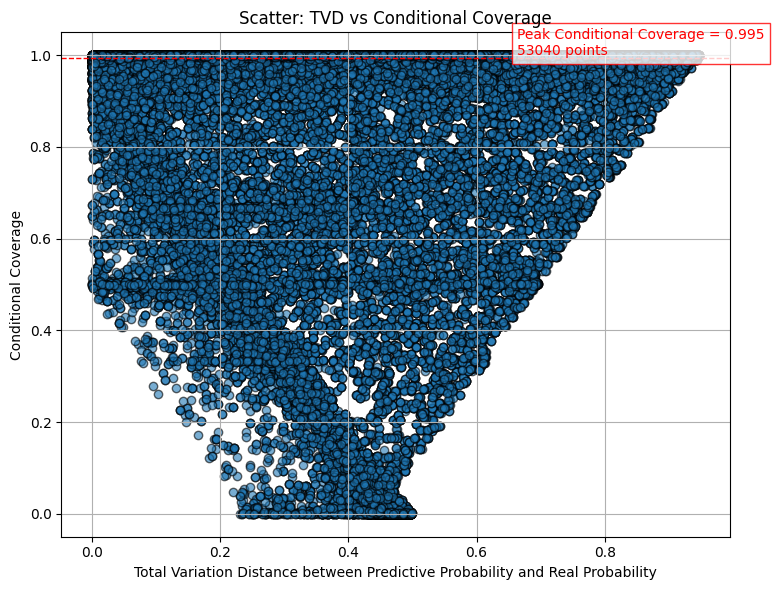

Peak Conditional Coverage = 0.995, with 53040 samples

=== Count Regions Summary ===
40929 (32.9%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
35491 (28.5%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
35174 (28.3%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.85134', '0.02824', '0.02166']
  Real Probability Set      : ['0.98688', '0.00534', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.96022']
  Real Probability Set      : ['0.96714']
Sample 3:
  Predictive Probability Set: ['1.00000']
  Real Probability Set      : ['0.99716']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.61687', '0.08198', '0.07974', '0.04075', '0.03967', '0.01881', '0.01542', '0.01540']
  Real Probability Set      : ['0.00054', '0.11231', '0.00054', '0.00054', '0.00000', '0.01452', '0.00054', '0.00054']
Sample 2:
  Predictive Probabil

In [2]:
aps_imagenet_real_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9346 ± 0.0021
Final Average Prediction Set Size: 4.38 ± 0.03
Final Average Coverage: 0.8987 ± 0.0023
Final Average Real Probability: 0.7875 ± 0.0033


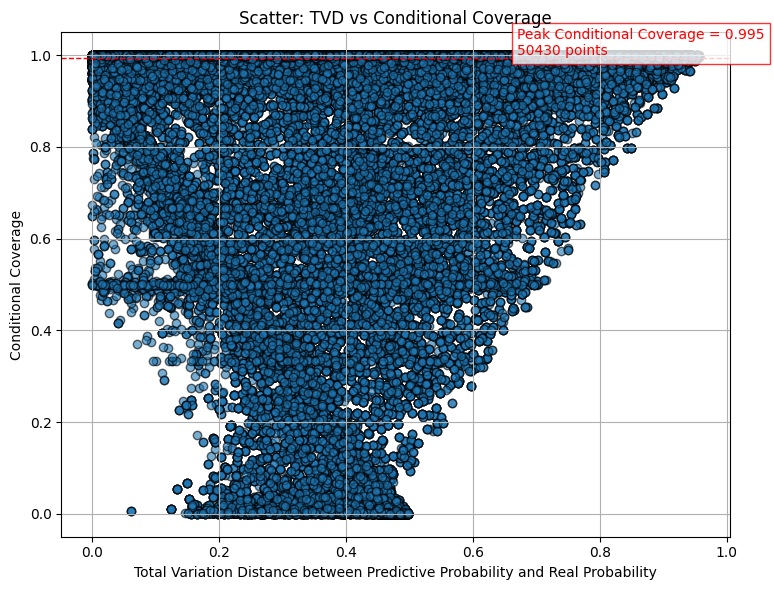

Peak Conditional Coverage = 0.995, with 50430 samples

=== Count Regions Summary ===
44734 (36.0%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
31300 (25.2%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
41102 (33.1%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.99388']
  Real Probability Set      : ['0.93731']
Sample 2:
  Predictive Probability Set: ['0.97957']
  Real Probability Set      : ['0.99932']
Sample 3:
  Predictive Probability Set: ['0.62673', '0.31993']
  Real Probability Set      : ['0.58077', '0.41900']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.64814', '0.28188']
  Real Probability Set      : ['0.00776', '0.00776']
Sample 2:
  Predictive Probability Set: ['0.35333', '0.16444', '0.10341', '0.08710', '0.04216', '0.03245', '0.03075', '0.02418', '0.01866']
  Real Probability Set      : ['0.00222', '0.

In [3]:
raps_imagenet_real_scatter(model, dataset, device, lambda_=0.07, k_reg=9, num_runs=10, alpha=0.1)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0226 ± 0.0106
Final Average Prediction Set Size: 2.99 ± 0.06
Final Average Coverage: 0.8991 ± 0.0031
Final Average Real Probability: 0.7428 ± 0.0048


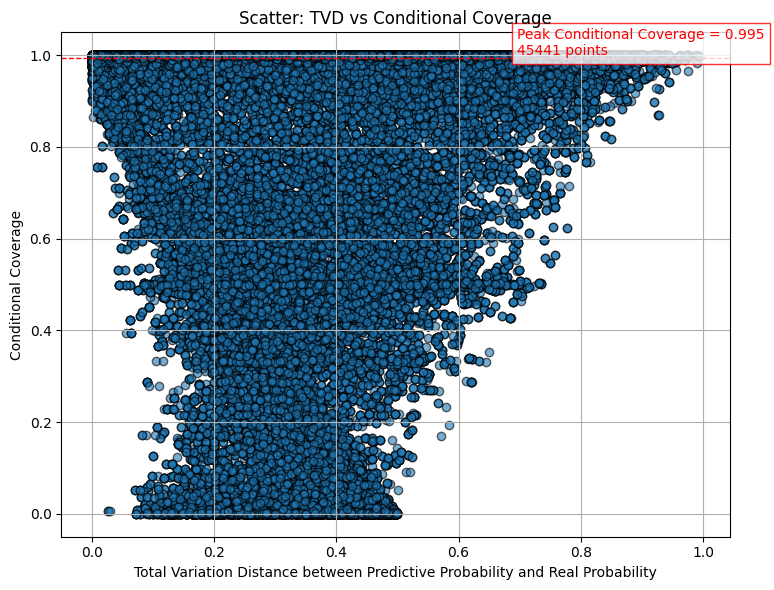

Peak Conditional Coverage = 0.995, with 45441 samples

=== Count Regions Summary ===
46791 (37.6%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
23597 (19.0%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
47337 (38.1%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.89934', '0.03004']
  Real Probability Set      : ['0.99871', '0.00043']
Sample 2:
  Predictive Probability Set: ['0.48169', '0.47182', '0.00728', '0.00650', '0.00562']
  Real Probability Set      : ['0.46831', '0.46709', '0.00000', '0.00000', '0.06422']
Sample 3:
  Predictive Probability Set: ['0.92154', '0.04820']
  Real Probability Set      : ['0.99580', '0.00210']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.64451', '0.05301', '0.04402', '0.02935']
  Real Probability Set      : ['0.00142', '0.00060', '0.07102', '0.00060']
Sample 2:
  Predictive Probabil

In [4]:
saps_imagenet_real_scatter(model, dataset, device, lambda_=0.15, num_runs=10, alpha=0.1)